The Counted is a project by the Guardian – and you – working to count the number of people killed by police and other law enforcement agencies in the United States throughout 2015 and 2016, to monitor their demographics and to tell the stories of how they died.

The database will combine Guardian reporting with verified crowdsourced information to build a more comprehensive record of such fatalities. The Counted is the most thorough public accounting for deadly use of force in the US, but it will operate as an imperfect work in progress – and will be updated by Guardian reporters and interactive journalists frequently.

Any deaths arising directly from encounters with law enforcement will be included in the database. This will inevitably include, but will likely not be limited to, people who were shot, tasered and struck by police vehicles as well those who died in police custody. Self-inflicted deaths during encounters with law enforcement or in police custody or detention facilities will not be included.

The US government has no comprehensive record of the number of people killed by law enforcement. This lack of basic data has been glaring amid the protests, riots and worldwide debate set in motion by the fatal police shooting of Michael Brown in August 2014. The Guardian agrees with those analysts, campaign groups, activists and authorities who argue that such accounting is a prerequisite for an informed public discussion about the use of force by police.

Contributions of any information that may improve the quality of our data will be greatly welcomed as we work toward better accountability. Please contact us at thecounted@theguardian.com.

CREDITS
Research and Reporting: Jon Swaine, Oliver Laughland, Jamiles Lartey
Design and Production: Kenan Davis, Rich Harris, Nadja Popovich, Kenton Powell

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
pk15 = pd.read_csv('PoliceKillings2015.csv')

In [3]:
pk16 = pd.read_csv('PoliceKillings2016.csv')

In [4]:
pk15.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
0,2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.066691,-81.167881,Death in custody,Chatham County Sheriff's Office
1,4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.487473,-122.891698,Gunshot,Washington County Sheriff's Office
2,5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.933347,-159.641972,Struck by vehicle,Kauai Police Department
3,6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,37.693797,-97.280549,Gunshot,Wichita Police Department
4,7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.246534,-123.119497,Gunshot,Mason County Sheriff's Office


In [5]:
pk16.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
0,20161,Joshua Sisson,30,Male,White,Knife,January,1,2016,4200 6th Ave,San Diego,CA,32.754508,-117.159648,Gunshot,San Diego Police Department
1,20162,Germonta Wallace,30,Male,Black,Firearm,January,3,2016,2600 Watson Dr,Charlotte,NC,35.218426,-80.885428,Gunshot,Charlotte-Mecklenburg Police Department
2,20163,Sean O'Brien,37,Male,White,Knife,January,2,2016,100 Washington St,Livingston,MT,45.655904,-110.573298,Gunshot,Livingston Police Department
3,20164,Rodney Turner,22,Male,Black,Firearm,January,4,2016,3600 NW 42nd St,Oklahoma City,OK,35.514287,-97.581618,Gunshot,Oklahoma City Police Department
4,20165,Eric Senegal,27,Male,Black,Unknown,January,4,2016,Gene Stanley Rd,Ragley,LA,30.493824,-93.207608,Gunshot,Beauregard Parish Sheriff's Office


In [6]:
pk15.columns

Index([u'uid', u'name', u'age', u'gender', u'raceethnicity', u'armed',
       u'month', u'day', u'year', u'streetaddress', u'city', u'state',
       u'latitude', u'longitude', u'classification', u'lawenforcementagency'],
      dtype='object')

In [7]:
pk16.columns

Index([u'uid', u'name', u'age', u'gender', u'raceethnicity', u'armed',
       u'month', u'day', u'year', u'streetaddress', u'city', u'state',
       u'latitude', u'longitude', u'classification', u'lawenforcementagency'],
      dtype='object')

In [8]:
pk15.dropna(inplace=True)
pk15=pk15[pk15['age']!='Unknown']
pk15.age=pk15.age.astype(np.int)

pk16.dropna(inplace=True)
pk16=pk16[(pk16['age']!='40s') & (pk16['age']!='Unknown') ]
pk16.age=pk16.age.astype(np.int)

In [9]:
pk15['armed'].unique()

array(['No', 'Firearm', 'Non-lethal firearm', 'Other', 'Knife', 'Vehicle',
       'Unknown', 'Disputed'], dtype=object)

In [10]:
pk15['classification'].unique()

array(['Death in custody', 'Gunshot', 'Struck by vehicle', 'Taser', 'Other'], dtype=object)

In [11]:
pk15['gender'].unique()

array(['Male', 'Female', 'Non-conforming'], dtype=object)

In [12]:
pk16['armed'].unique()

array(['Knife', 'Firearm', 'Unknown', 'No', 'Non-lethal firearm', 'Other',
       'Vehicle', 'Disputed'], dtype=object)

In [13]:
pk16['classification'].unique()

array(['Gunshot', 'Struck by vehicle', 'Death in custody', 'Taser', 'Other'], dtype=object)

In [14]:
pk16['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
r15= pk15['raceethnicity'].value_counts()
r15

White                     569
Black                     299
Hispanic/Latino           188
Asian/Pacific Islander     24
Native American            13
Unknown                    13
Arab-American               4
Other                       1
Name: raceethnicity, dtype: int64

In [16]:
r16 = pk16['raceethnicity'].value_counts()
r16

White                     533
Black                     256
Hispanic/Latino           176
Asian/Pacific Islander     21
Unknown                    20
Native American            19
Arab-American               3
Name: raceethnicity, dtype: int64

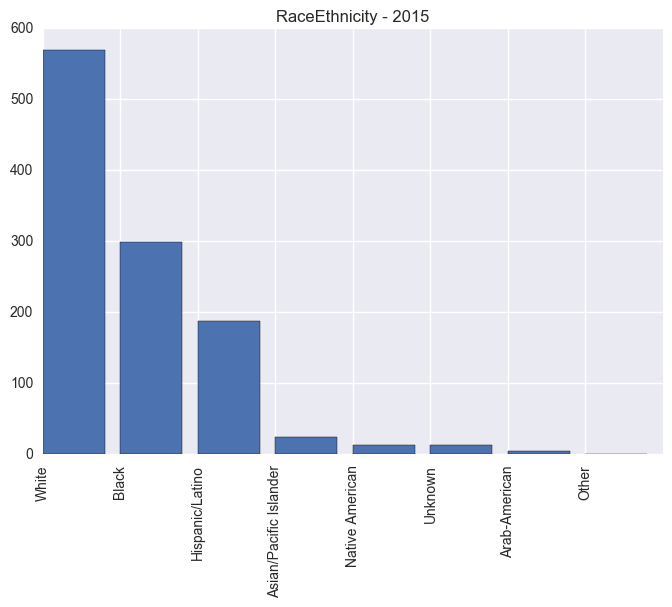

In [17]:
plt.bar(range(8), r15)
plt.xticks(range(8), r15.index, rotation = 'vertical')
plt.title('RaceEthnicity - 2015')

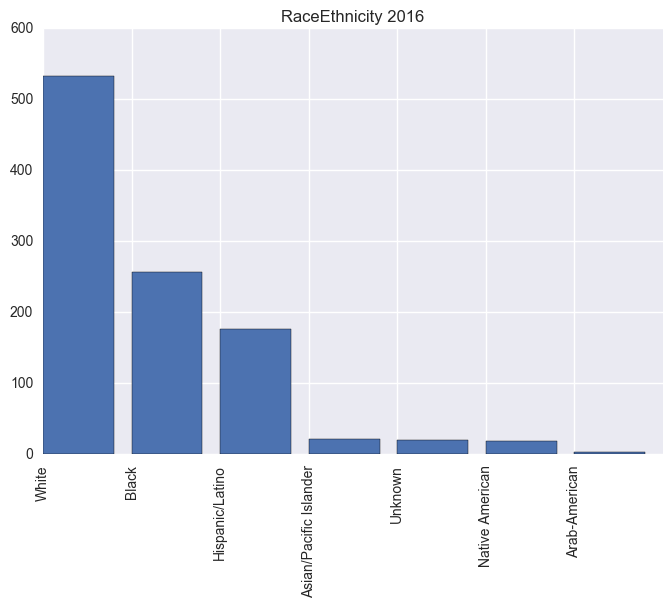

In [18]:
plt.bar(range(7), r16)
plt.xticks(range(7), r16.index, rotation = 'vertical')
plt.title('RaceEthnicity 2016')

In [19]:
#Proportion of races
p15 = r15/ sum(r15)
print p15


White                     0.512151
Black                     0.269127
Hispanic/Latino           0.169217
Asian/Pacific Islander    0.021602
Native American           0.011701
Unknown                   0.011701
Arab-American             0.003600
Other                     0.000900
Name: raceethnicity, dtype: float64


In [20]:
#Proportion of races
p16 = r16/ sum(r16)
print p16

White                     0.518482
Black                     0.249027
Hispanic/Latino           0.171206
Asian/Pacific Islander    0.020428
Unknown                   0.019455
Native American           0.018482
Arab-American             0.002918
Name: raceethnicity, dtype: float64


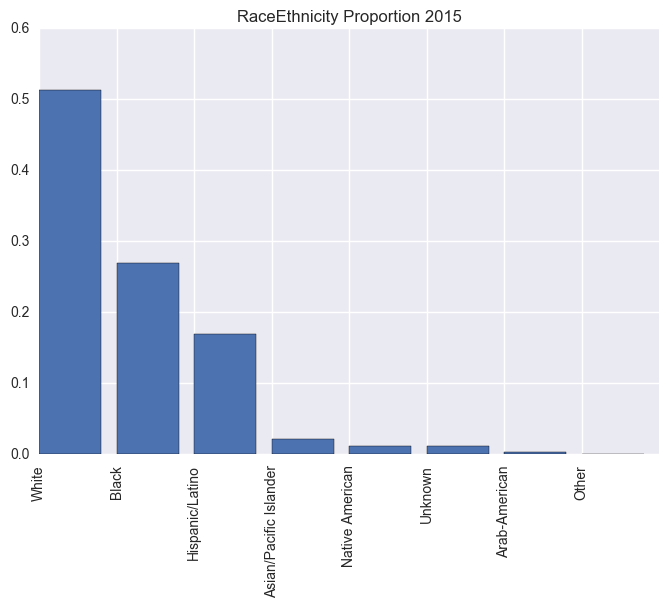

In [21]:
#Proportion plot
plt.bar(range(8), p15)
plt.xticks(range(8), p15.index, rotation = 'vertical')
plt.title('RaceEthnicity Proportion 2015')

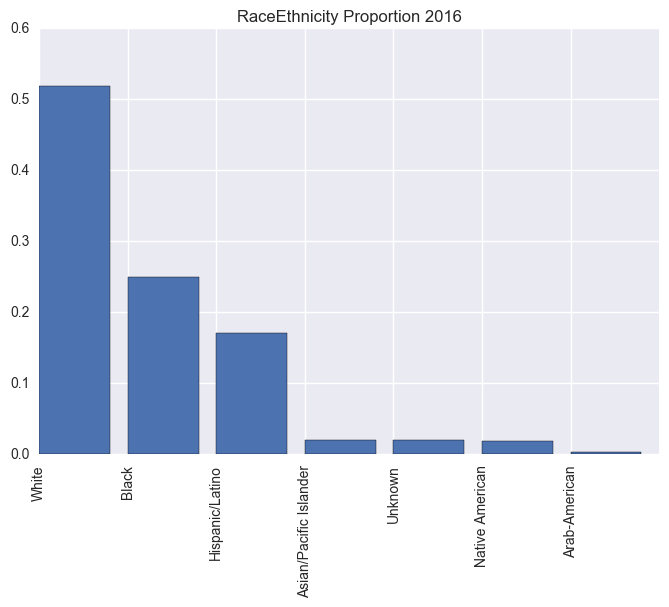

In [22]:
plt.bar(range(7), p16)
plt.xticks(range(7), p16.index, rotation = 'vertical')
plt.title('RaceEthnicity Proportion 2016')

In [23]:
#Convert  to numeric
pk15['armed'].replace(['No', 'Firearm', 'Non-lethal firearm', 'Other', 'Knife', 'Vehicle', 'Unknown',
        'Disputed'], [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
pk16['armed'].replace(['No', 'Firearm', 'Non-lethal firearm', 'Other', 'Knife', 'Vehicle', 'Unknown',
        'Disputed'], [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
pk15['classification'].replace(['Death in custody', 'Gunshot', 'Struck by vehicle', 'Taser', 'Other'], [0, 1, 2, 3, 4], inplace = True)
pk16['classification'].replace(['Death in custody', 'Gunshot', 'Struck by vehicle', 'Taser', 'Other'], [0, 1, 2, 3, 4], inplace = True)
pk15['gender'].replace(['Male', 'Female', 'Non-conforming'], [0, 1, 2], inplace = True)
pk16['gender'].replace(['Male', 'Female'], [0, 1], inplace = True)

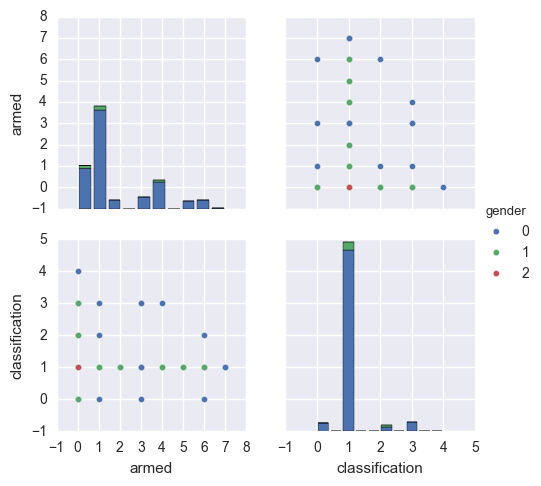

In [24]:
sb.pairplot(pk15, hue="gender", vars=['armed', 'classification'])
plt.show()

In [26]:
pk15.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
0,2,Matthew Ajibade,22,0,Black,0,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.066691,-81.167881,0,Chatham County Sheriff's Office
1,4,Lewis Lembke,47,0,White,1,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.487473,-122.891698,1,Washington County Sheriff's Office
2,5,Michael Kocher Jr,19,0,White,0,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.933347,-159.641972,2,Kauai Police Department
3,6,John Quintero,23,0,Hispanic/Latino,0,January,3,2015,500 North Oliver Ave,Wichita,KS,37.693797,-97.280549,1,Wichita Police Department
4,7,Tim Elliott,53,0,Asian/Pacific Islander,1,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.246534,-123.119497,1,Mason County Sheriff's Office


In [27]:
pk16.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
0,20161,Joshua Sisson,30,0,White,4,January,1,2016,4200 6th Ave,San Diego,CA,32.754508,-117.159648,1,San Diego Police Department
1,20162,Germonta Wallace,30,0,Black,1,January,3,2016,2600 Watson Dr,Charlotte,NC,35.218426,-80.885428,1,Charlotte-Mecklenburg Police Department
2,20163,Sean O'Brien,37,0,White,4,January,2,2016,100 Washington St,Livingston,MT,45.655904,-110.573298,1,Livingston Police Department
3,20164,Rodney Turner,22,0,Black,1,January,4,2016,3600 NW 42nd St,Oklahoma City,OK,35.514287,-97.581618,1,Oklahoma City Police Department
4,20165,Eric Senegal,27,0,Black,6,January,4,2016,Gene Stanley Rd,Ragley,LA,30.493824,-93.207608,1,Beauregard Parish Sheriff's Office


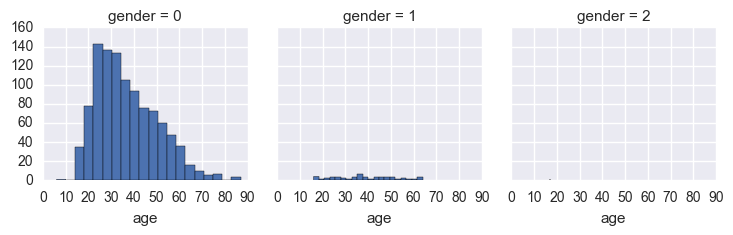

In [36]:
#gender and age distribbution; 0=male;1=female;2=non-confirming
g=sb.FacetGrid(pk15,col='gender',size=2.5)
g.map(plt.hist,'age',bins=20)

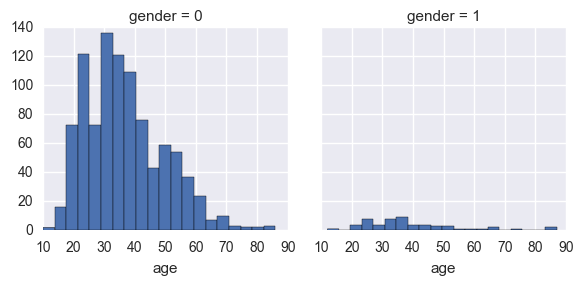

In [37]:
g=sb.FacetGrid(pk16,col='gender')
g.map(plt.hist,'age',bins=20)

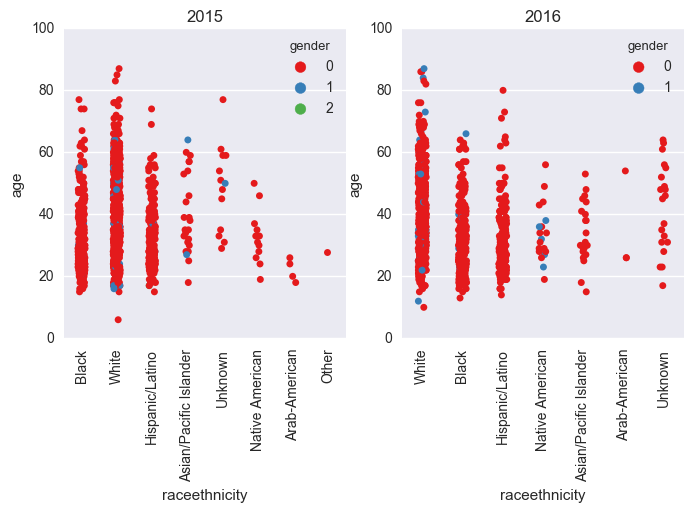

In [35]:
#race distribution
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
sb.stripplot(x='raceethnicity',y='age',hue='gender',data=pk15,jitter=True,palette='Set1',ax=axes[0])
axes[0].set_xticklabels(axes[0].xaxis.get_majorticklabels(), rotation=90)
axes[0].set_title('2015')

sb.stripplot(x='raceethnicity',y='age',hue='gender',data=pk16,jitter=True,palette='Set1',ax=axes[1])
axes[1].set_xticklabels(axes[1].xaxis.get_majorticklabels(), rotation=90)
axes[1].set_title('2016')

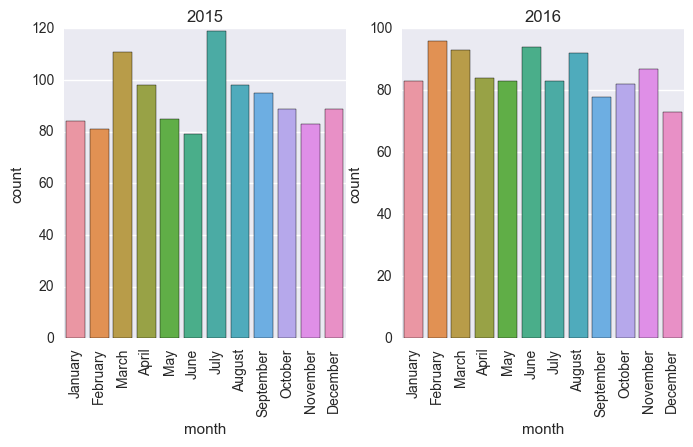

In [39]:
#Month of killings
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,4))

sb.countplot(x='month',data=pk15,ax=axes[0])
axes[0].set_xticklabels(axes[0].xaxis.get_majorticklabels(), rotation=90)
axes[0].set_title('2015')

sb.countplot(x='month',data=pk16,ax=axes[1])
axes[1].set_xticklabels(axes[1].xaxis.get_majorticklabels(), rotation=90)
axes[1].set_title('2016')

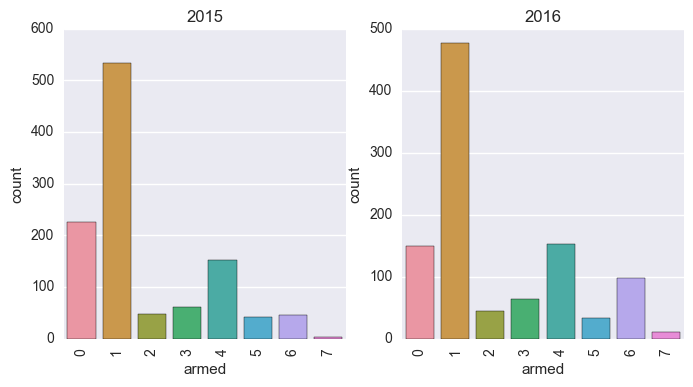

In [42]:
#Month of killings
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,4))

sb.countplot(x='armed',data=pk15,ax=axes[0])
axes[0].set_xticklabels(axes[0].xaxis.get_majorticklabels(), rotation=90)
axes[0].set_title('2015')

sb.countplot(x='armed',data=pk16,ax=axes[1])
axes[1].set_xticklabels(axes[1].xaxis.get_majorticklabels(), rotation=90)
axes[1].set_title('2016')

Lot of them had fire-arms(bar 1). At the same time many were unarmed(bar 0)

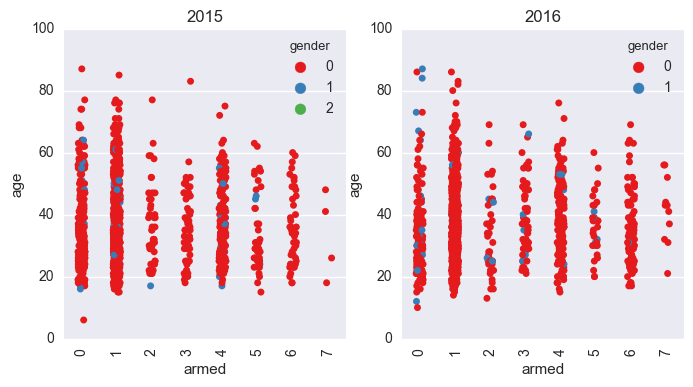

In [43]:
#race distribution
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
sb.stripplot(x='armed',y='age',hue='gender',data=pk15,jitter=True,palette='Set1',ax=axes[0])
axes[0].set_xticklabels(axes[0].xaxis.get_majorticklabels(), rotation=90)
axes[0].set_title('2015')

sb.stripplot(x='armed',y='age',hue='gender',data=pk16,jitter=True,palette='Set1',ax=axes[1])
axes[1].set_xticklabels(axes[1].xaxis.get_majorticklabels(), rotation=90)
axes[1].set_title('2016')

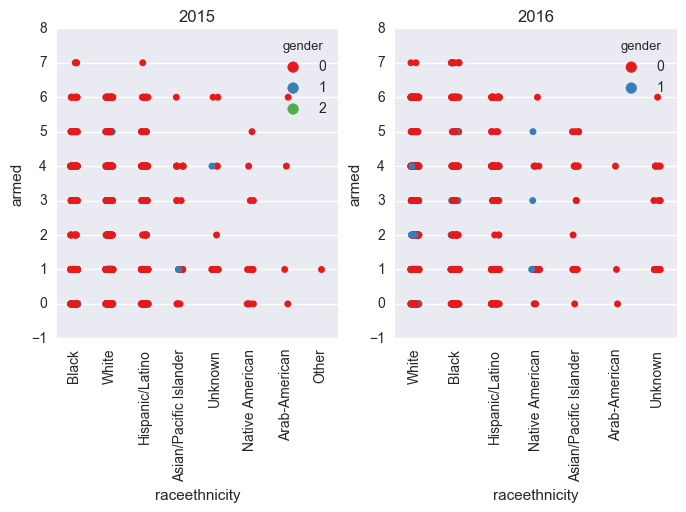

In [45]:
#race distribution
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
sb.stripplot(x='raceethnicity',y='armed',hue='gender',data=pk15,jitter=True,palette='Set1',ax=axes[0])
axes[0].set_xticklabels(axes[0].xaxis.get_majorticklabels(), rotation=90)
axes[0].set_title('2015')

sb.stripplot(x='raceethnicity',y='armed',hue='gender',data=pk16,jitter=True,palette='Set1',ax=axes[1])
axes[1].set_xticklabels(axes[1].xaxis.get_majorticklabels(), rotation=90)
axes[1].set_title('2016')